Packages & Data Load

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler 
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings

pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

df = pd.read_csv('C:\\Users\\alexr\\Desktop\\   \\Work\\Data Science\\In Use\\Marketing Data\\Merged.csv')

In [2]:
import statsmodels.api as sm

Overview

In [3]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n_Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,ID,Year_Birth,Dt_Customer
0,4428,0,1,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0,51,2426,0,1,0,0,0,0,0,1,0,0,38,-283,0,10311,1969,2013-10-05 00:00:00.0000000
1,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,0,3,11,1,31,2241,0,0,1,0,0,0,0,1,0,0,57,23,1,5371,1989,2014-04-08 00:00:00.0000000
2,26872,0,0,0,3,10,8,3,16,32,1,1,1,2,6,0,0,0,0,0,0,3,11,0,39,2415,0,1,0,0,0,0,0,1,0,0,40,8,0,2964,1981,2013-10-16 00:00:00.0000000
3,30523,2,1,0,5,0,3,0,0,5,1,1,0,2,7,0,0,0,0,0,0,3,11,0,62,2522,0,0,1,0,0,0,0,0,1,0,8,3,0,2795,1958,2013-07-01 00:00:00.0000000
4,32173,0,1,0,18,0,2,0,0,2,1,1,0,3,4,0,0,0,0,0,0,3,11,0,62,2491,1,0,0,0,0,0,0,0,0,1,20,18,0,10175,1958,2013-08-01 00:00:00.0000000


Above shows the data of a supermarket purchases and other demographic trait. 
<br><br>Our main concern should be what affects their total purchases which is <b>MntTotal

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Income                2002 non-null   int64 
 1   Kidhome               2002 non-null   int64 
 2   Teenhome              2002 non-null   int64 
 3   Recency               2002 non-null   int64 
 4   MntWines              2002 non-null   int64 
 5   MntFruits             2002 non-null   int64 
 6   MntMeatProducts       2002 non-null   int64 
 7   MntFishProducts       2002 non-null   int64 
 8   MntSweetProducts      2002 non-null   int64 
 9   MntGoldProds          2002 non-null   int64 
 10  NumDealsPurchases     2002 non-null   int64 
 11  NumWebPurchases       2002 non-null   int64 
 12  NumCatalogPurchases   2002 non-null   int64 
 13  NumStorePurchases     2002 non-null   int64 
 14  NumWebVisitsMonth     2002 non-null   int64 
 15  AcceptedCmp3          2002 non-null   

The data has no missing value, the only thing we need to do is to sort out the dtypes

Let's see the correlation heatmap

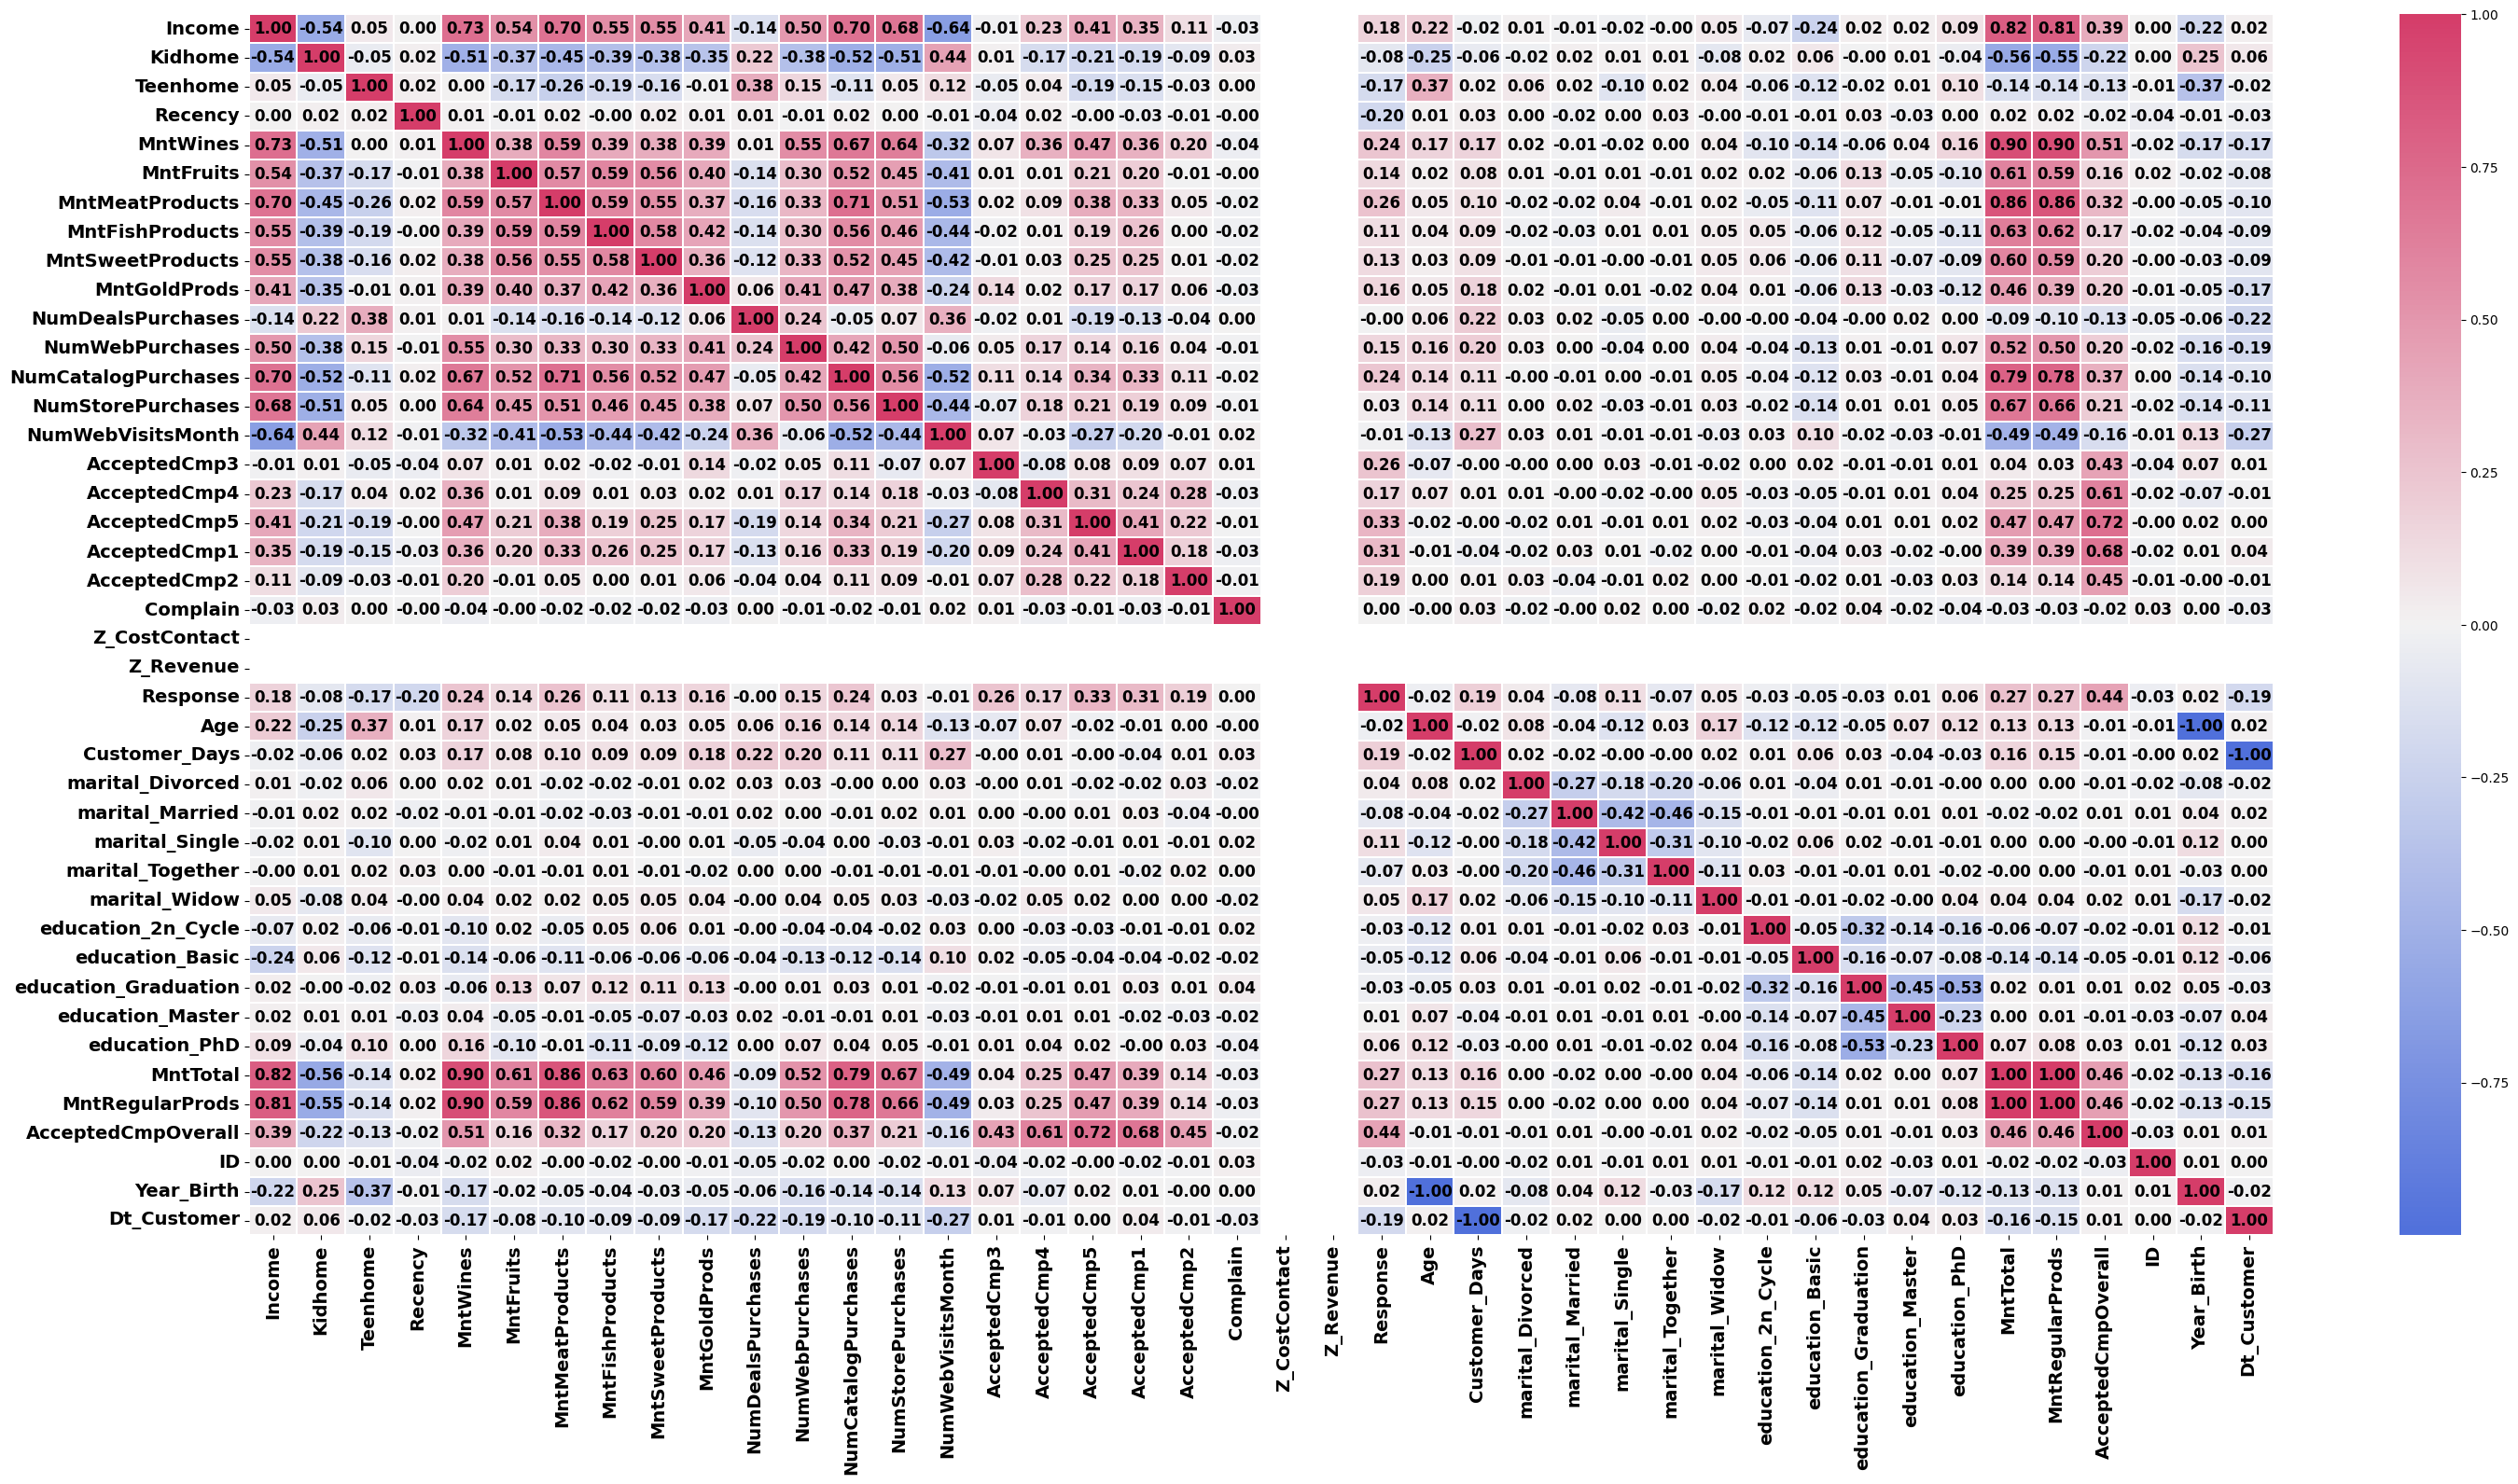

In [5]:
#Heatmap for correlation

# Initialize LabelEncoder object
label_encode = LabelEncoder()

# Create a copy of the DataFrame
df2 = df.copy()

# Iterate over columns in DataFrame
for i in df2.columns:
    # If column type is 'object', encode it using LabelEncoder
    if df2[i].dtype == 'object':
        df2[i] = LabelEncoder().fit_transform(df2[i])

# Plot correlation heatmap of modified DataFrame
plt.figure(figsize=(35, 17), facecolor='none')
sns.heatmap(
    df2.corr(),
    cmap=sns.diverging_palette(260, 360, as_cmap=True),
    annot=True,
    linewidths=0.2,
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},
    fmt='.2f',
)
plt.xticks(fontsize=14, weight='bold', rotation=90)
plt.yticks(fontsize=14, weight='bold')
plt.show()

Data can be categorized into a few major point, which is:
1. Income
2. Number of children
3. Marital Status
4. Education level
5. Method of Purchases

The Purchase categories can be used for more information

Data Clean

In [6]:
#drop unused column
df.drop(columns=['Z_CostContact','Z_Revenue','Recency','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
                 'AcceptedCmp5','Response','Complain','Year_Birth','Dt_Customer','Customer_Days','AcceptedCmpOverall'], inplace=True)

In [7]:
#assign dtype
convert = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together',
           'marital_Widow', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'education_2n_Cycle']
df[convert] = df[convert].astype(bool)

convert = ['ID','Kidhome','Teenhome']
df[convert] = df[convert].astype(object)

We can compile few column into one to simplify things

In [8]:
def get_education_status(row):
    if row['education_Basic'] == 1:
        return 'Basic'
    elif row['education_Graduation'] == 1:
        return 'Graduation'
    elif row['education_Master'] == 1:
        return 'Master'
    elif row['education_PhD'] == 1:
        return 'PhD'
    elif row['education_2n_Cycle'] == 1:
        return '2n_Cycle'
    else:
        return 'Unknown'
df['Education'] = df.apply(get_education_status, axis=1)

df.drop(columns=['education_Basic','education_Graduation','education_Master','education_PhD','education_2n_Cycle'], inplace=True)

In [9]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
df['Marital'] = df.apply(get_marital_status, axis=1)

df.drop(columns=['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow'], inplace=True)

In [10]:
def get_children(row):
    if row['Kidhome'] >=1:
        return 1
    elif row['Teenhome'] >= 1:
        return 1
    else:
        return 0
df['Children'] = df.apply(get_children, axis=1)

df.drop(columns=['Kidhome','Teenhome'], inplace=True)

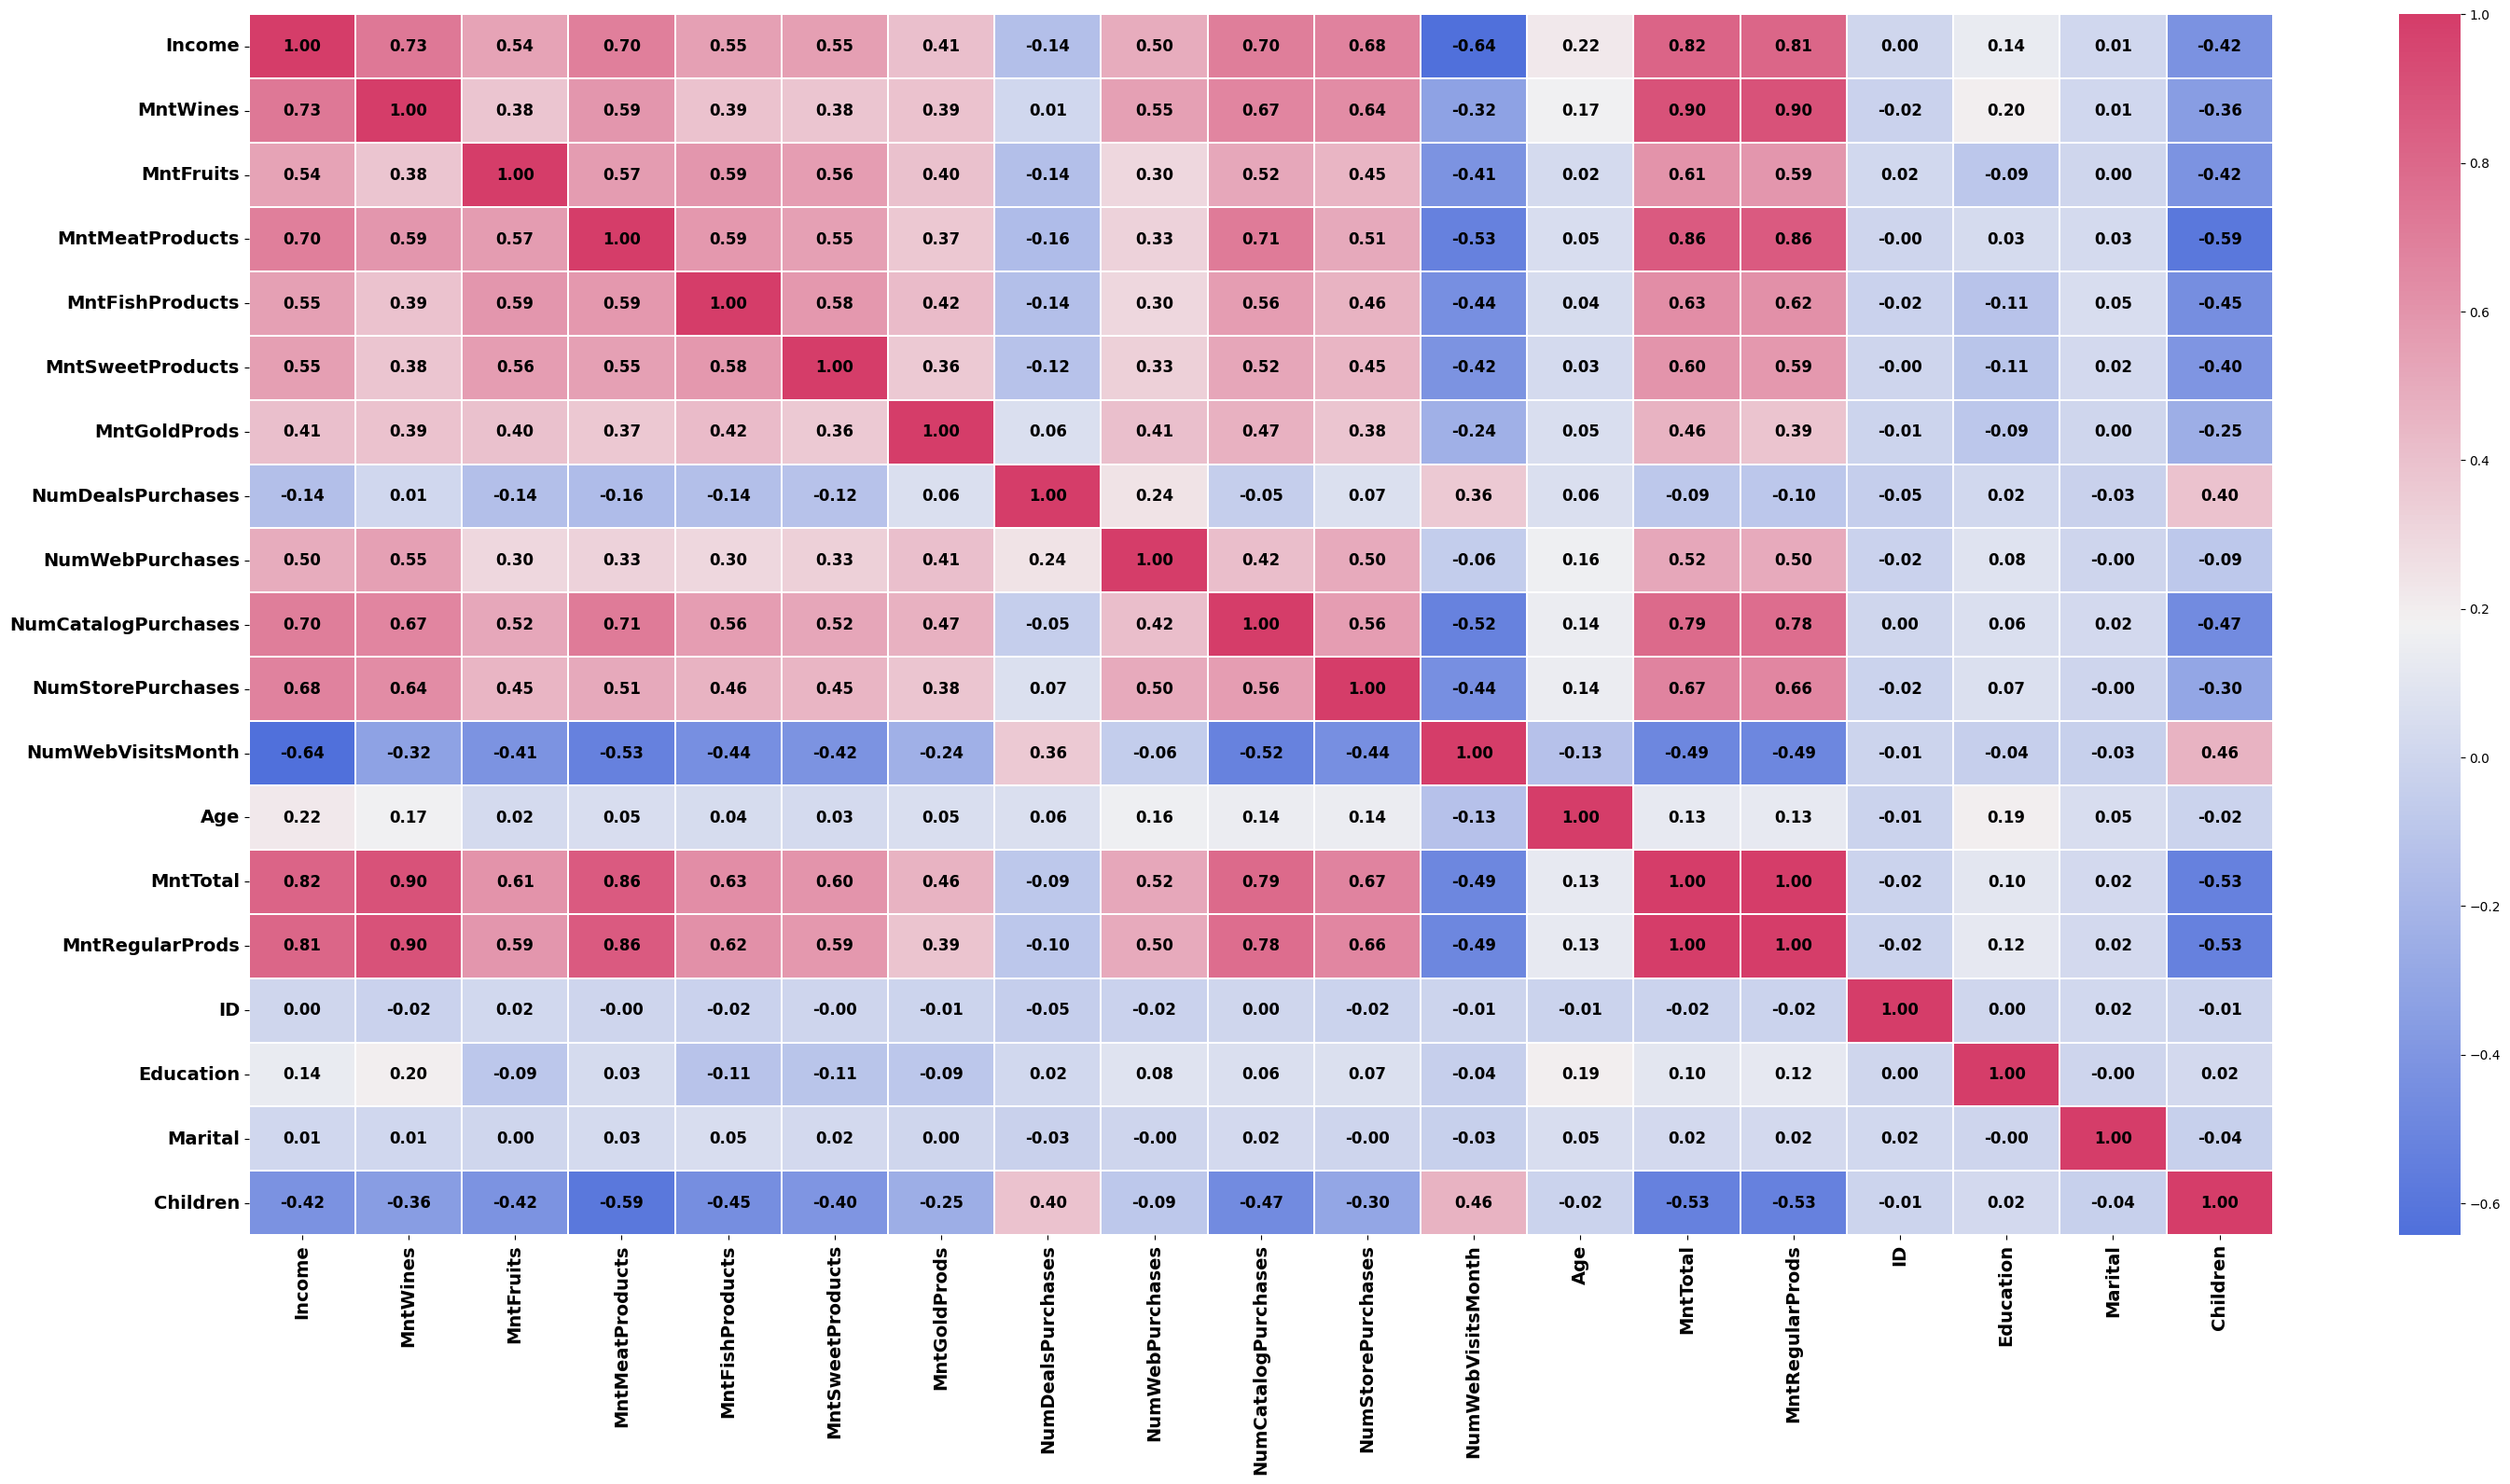

In [11]:
#Heatmap for correlation

# Initialize LabelEncoder object
label_encode = LabelEncoder()

# Create a copy of the DataFrame
df2 = df.copy()

# Iterate over columns in DataFrame
for i in df2.columns:
    # If column type is 'object', encode it using LabelEncoder
    if df2[i].dtype == 'object':
        df2[i] = LabelEncoder().fit_transform(df2[i])

# Plot correlation heatmap of modified DataFrame
plt.figure(figsize=(35, 17), facecolor='none')
sns.heatmap(
    df2.corr(),
    cmap=sns.diverging_palette(260, 360, as_cmap=True),
    annot=True,
    linewidths=0.2,
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},
    fmt='.2f',
)
plt.xticks(fontsize=14, weight='bold', rotation=90)
plt.yticks(fontsize=14, weight='bold')
plt.show()

In [12]:
#separate numerical and categorical column
num_df = df.select_dtypes(include = ['float','int64'])
cat_df = df.select_dtypes(include=['bool','object'])
cat_df.drop(columns=['ID'], inplace=True)


Visualization

In [13]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2002.0,51642.016983,20770.423997,1730.0,35352.0,51411.5,68307.25,113734.0
MntWines,2002.0,305.793706,336.971214,0.0,24.0,178.0,506.50,1493.0
MntFruits,2002.0,26.451548,39.844737,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2002.0,165.853147,219.292567,0.0,16.0,68.0,230.00,1725.0
MntFishProducts,2002.0,37.642358,54.826718,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2002.0,27.312687,41.559446,0.0,1.0,8.0,34.00,262.0
MntGoldProds,2002.0,43.737762,51.503237,0.0,9.0,24.0,56.00,321.0
NumDealsPurchases,2002.0,2.321179,1.884003,0.0,1.0,2.0,3.00,15.0
NumWebPurchases,2002.0,4.116384,2.755022,0.0,2.0,4.0,6.00,27.0
NumCatalogPurchases,2002.0,2.639860,2.800669,0.0,0.0,2.0,4.00,28.0


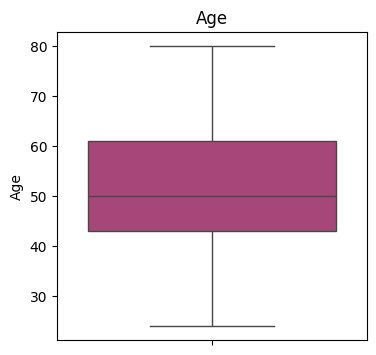

In [14]:
plt.figure(figsize=(4, 4))
ax = sns.boxplot(y='Age', data=df, palette='magma')
        
plt.title('Age')
plt.ylabel('Age')
plt.show()

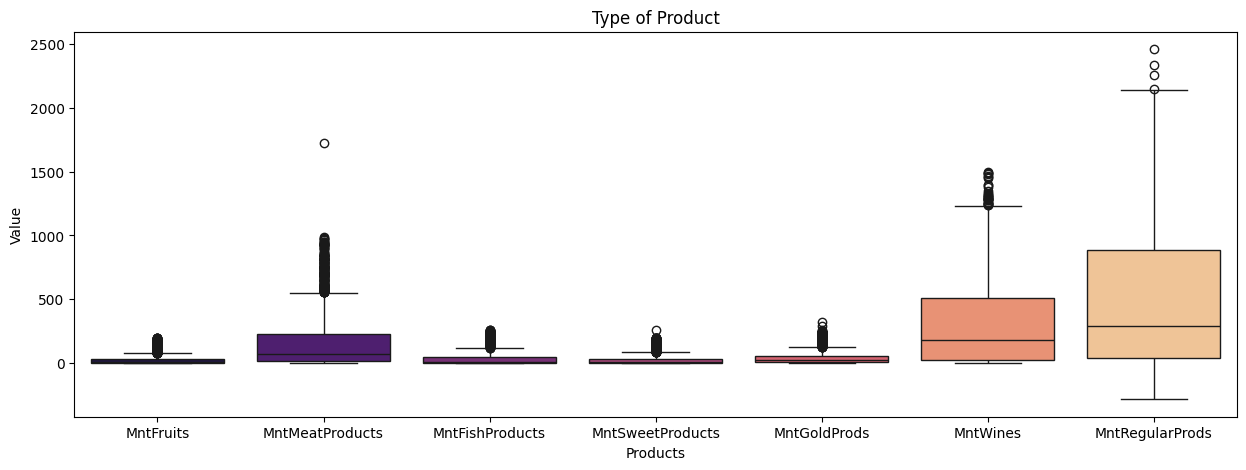

In [15]:
Mnt_Purchases = df[['MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','MntWines','MntRegularProds']]
Mnt_Purchases = Mnt_Purchases.melt(var_name ='Type_of_Product',value_name = 'Value')

plt.figure(figsize=(15, 5))
ax = sns.boxplot(x='Type_of_Product',y='Value', data=Mnt_Purchases, palette='magma')
        
plt.title('Type of Product')
plt.xlabel('Products')
plt.ylabel('Value')
plt.show()

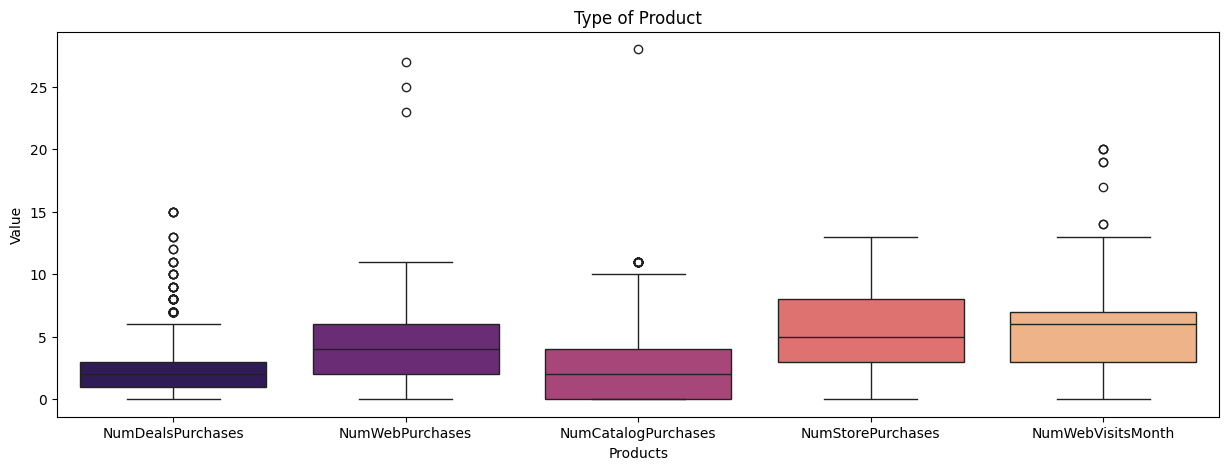

In [16]:
Mthd_Purchases = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]
Mthd_Purchases = Mthd_Purchases.melt(var_name ='Type_of_Product',value_name = 'Value')

plt.figure(figsize=(15, 5))
ax = sns.boxplot(x='Type_of_Product',y='Value', data=Mthd_Purchases, palette='magma')
        
plt.title('Type of Product')
plt.xlabel('Products')
plt.ylabel('Value')
plt.show()

In [17]:
cat_df.describe().T

,count,unique,top,freq
Education,2002,5,Graduation,1011
Marital,2002,5,Married,780


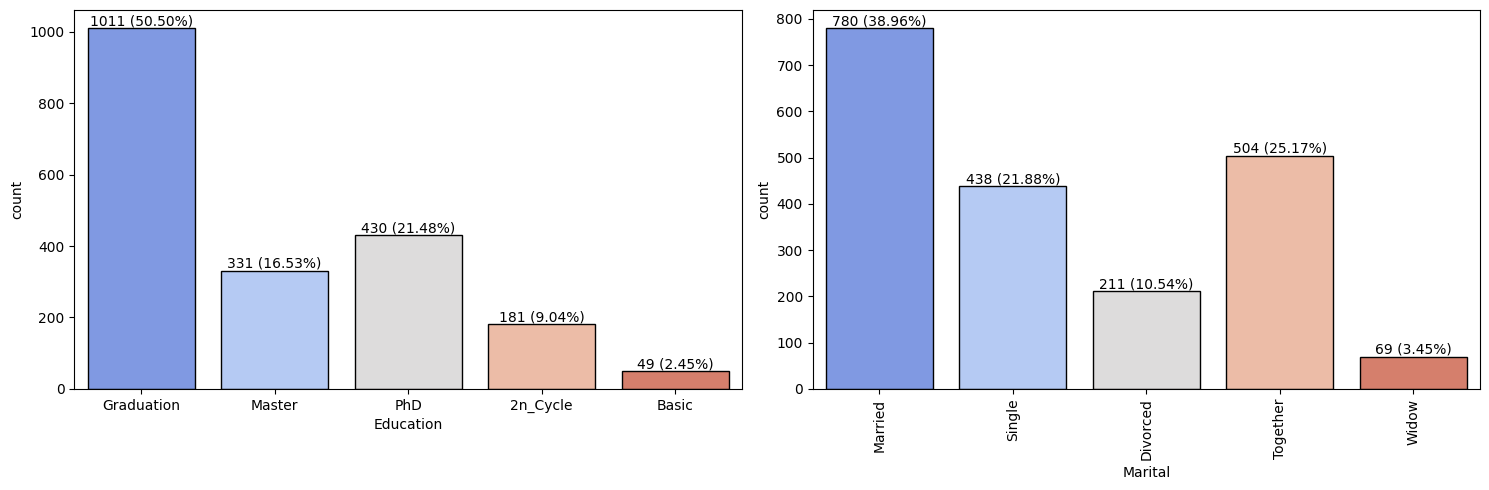

In [18]:
#ALL visualize filtered categorical data
plt.figure(figsize = (15,5))

for i in enumerate(cat_df):
    plt.subplot(1,2,i[0]+1)
    #use hue to filter with one other category
    ax = sns.countplot(x=i[1]
                  ,data = cat_df
                  ,edgecolor='black'
                  ,palette = 'coolwarm'
                  )    

    for p in ax.patches:
        total = len(cat_df[i[1]])
        height = p.get_height()

        ax.text(p.get_x() + p.get_width() / 2, 
                p.get_height(),
                f'{height:.0f} ({100 * height / total:.2f}%)' 

                ,ha='center'
                ,va='bottom'
                ,fontsize=10
                ,color='black'
                )
        
plt.xticks(rotation = 90)
#adjust layout
plt.tight_layout()
#Show the plots
plt.show()

Clustering

In [19]:
#Standardize variable for clustering
scaler = StandardScaler()
cols_for_clustering = ['Income','MntTotal','Children']

data_scaled = df.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])

In [20]:
#apply PCA
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

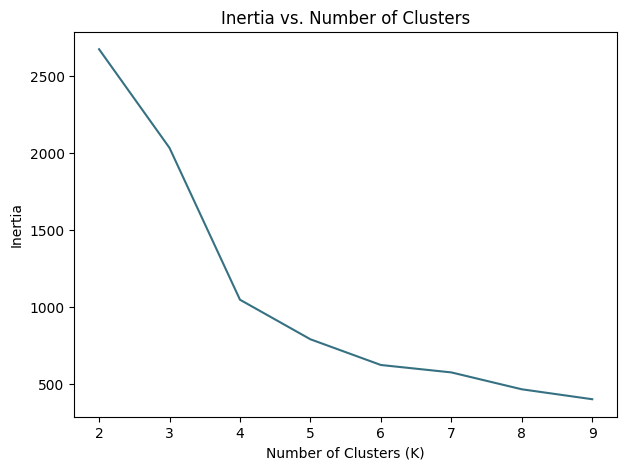

In [21]:
#show elbow method
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)
    
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))

plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

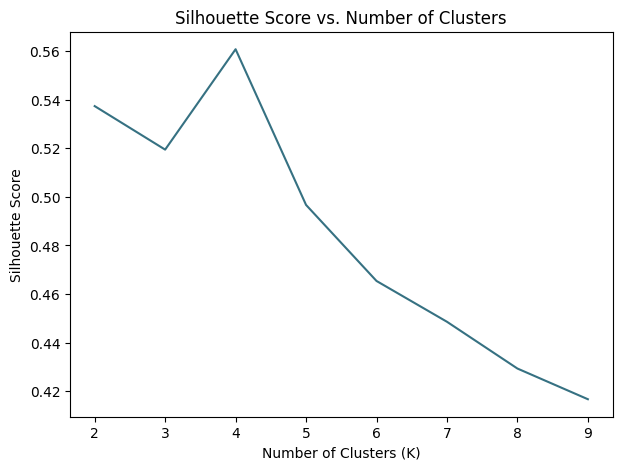

In [22]:
#show silhouette score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

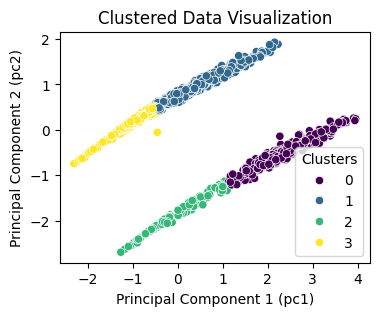

In [23]:
#show PCA

model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

plt.figure(figsize=(4, 3))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [24]:
#Cluster definition
df['Cluster'] = data_scaled.Cluster
df.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,Children
Cluster,,,
0,76835.640476,1341.819048,0.0
1,64493.163107,832.258252,1.0
2,32416.524476,205.741259,0.0
3,36003.037879,114.323593,1.0


In [25]:
mnt_data = df.groupby('Cluster')[['MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','MntWines','MntRegularProds']].mean().reset_index()
mnt_data.head()

,Cluster,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntWines,MntRegularProds
0,0,65.190476,479.821429,93.671429,66.683333,74.242857,636.452381,1267.576190
1,1,35.326214,182.607767,48.378641,37.689320,63.621359,528.256311,768.636893
2,2,17.160839,55.517483,27.328671,17.363636,33.874126,88.370629,171.867133
3,3,5.334416,30.877706,7.786797,5.173160,20.316017,65.151515,94.007576


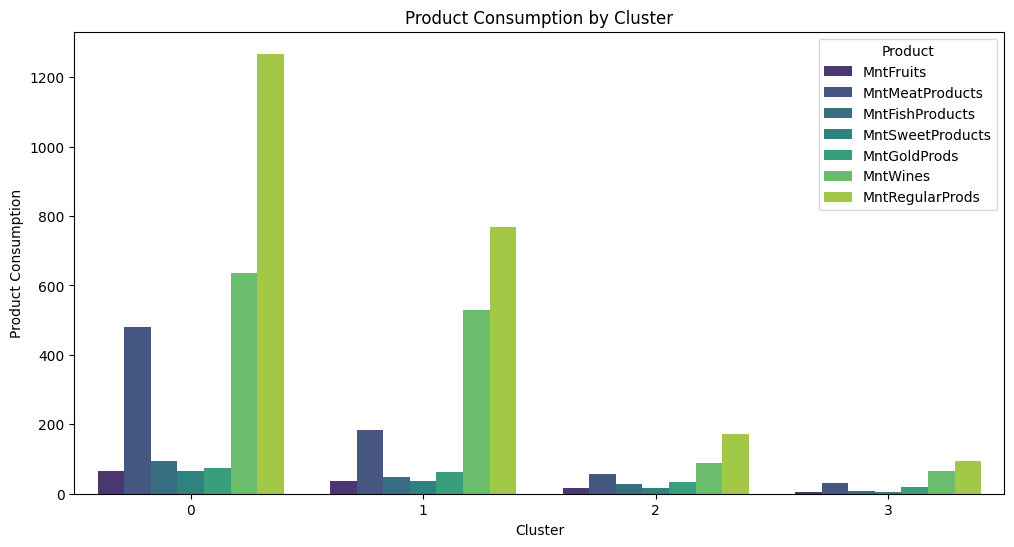

In [26]:
#purchases per group
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None
            , palette="viridis"
            ,estimator = 'sum')
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

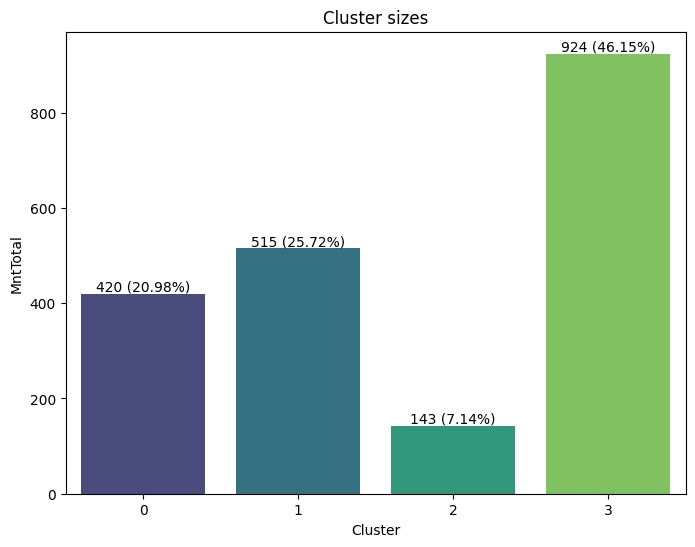

In [27]:
#cluser size
cluster_sizes = df.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')

for p in ax.patches:
        total = len(df)
        height = p.get_height()

        ax.text(p.get_x() + p.get_width() / 2, 
                p.get_height(),
                f'{height:.0f} ({100 * height / total:.2f}%)' 

                ,ha='center'
                ,va='bottom'
                ,fontsize=10
                ,color='black'
                )
        
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')
plt.show()

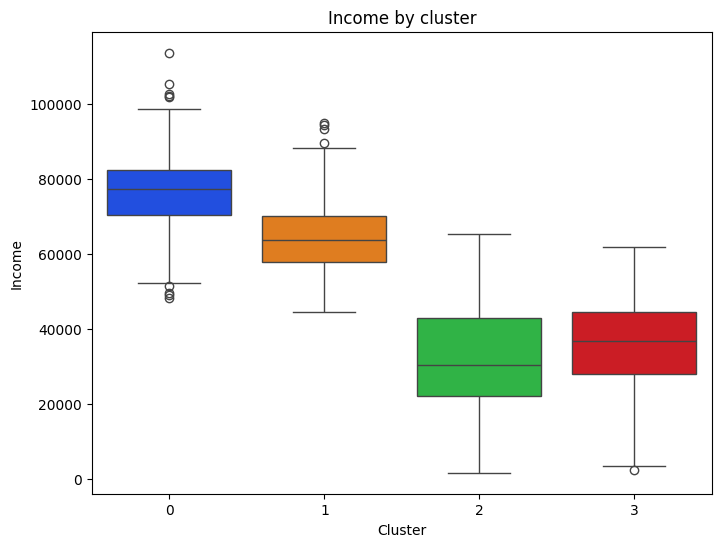

In [28]:
#cluster income
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=df, palette='bright')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

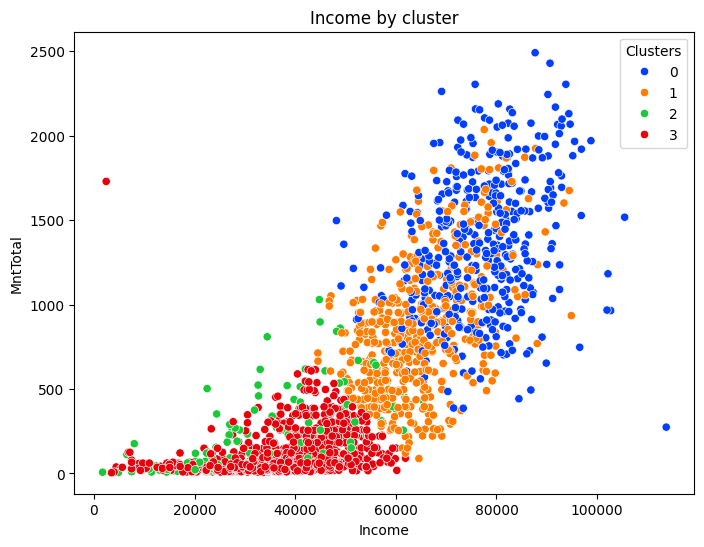

In [29]:
#visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=df, hue = 'Cluster', palette='bright')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')
plt.show()

Text(0, 0.5, 'MntTotal')

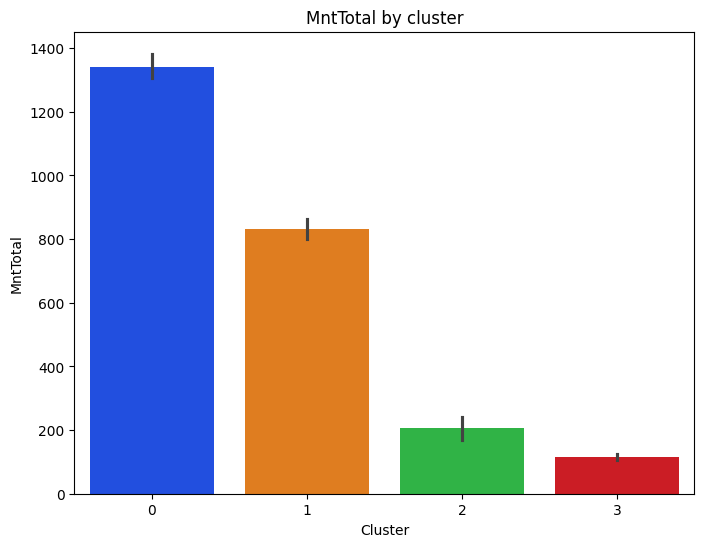

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='MntTotal', data=df, palette='bright',estimator = 'average')
        
plt.title('MntTotal by cluster')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')